In [1]:
import m
import matplotlib.pyplot as plt
import datetime
import pandas as pd

# 00. table 기본 탐색

In [2]:
for table_ in ['products_info','train_x_past','train_x_current','train_y','test_x_past','test_x_current'] :
    m.table기본(table_)


 ***products_info*** 

- shape  :  (100, 6)
- colume :  ['product_id', 'name', 'category_id', 'division_id', 'category_name', 'division_name']
- colume_type 
 product_id       object
name             object
category_id      object
division_id      object
category_name    object
division_name    object
dtype: object
- unique
product_id  :  100
name  :  100
category_id  :  21
division_id  :  9
category_name  :  21
division_name  :  9
----------------------------------------------

 ***train_x_past*** 

- shape  :  (1253972, 9)
- colume :  ['order_id', 'cstno', 'order_number', 'week_day', 'order_hour', 'order_interval', 'add_order', 'is_reordered', 'product_id']
- colume_type 
 order_id          object
cstno             object
order_number      object
week_day          object
order_hour        object
order_interval    object
add_order         object
is_reordered      object
product_id        object
dtype: object
- unique
order_id  :  341678
cstno  :  5859
order_number  :  99
week_day  : 

# 01. EDA(train past, current merge)

In [13]:
train_x_past = m._read_table('train_x_past')

In [14]:
train_x_current = m._read_table('train_x_current')

In [15]:
train_y = m._read_table('train_y')

In [16]:
train_x_current['product_id'] = train_y.product_id.to_list()

In [17]:
train = m.pd.concat([train_x_past,train_x_current]).sort_values(['cstno','order_id']).reset_index(drop=True)

In [18]:
products_info = m._read_table('products_info')

In [19]:
train = train.merge(products_info,on='product_id',how='left')
train

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,name,category_id,division_id,category_name,division_name
0,103998,10000,6,3,6,6.0,3,0,33000,Pure Irish Butter,36,16,butter,dairy eggs
1,103998,10000,6,3,6,6.0,11,0,41220,Organic Romaine Lettuce,83,4,fresh vegetables,produce
2,103998,10000,6,3,6,6.0,10,1,15290,Orange Bell Pepper,83,4,fresh vegetables,produce
3,103998,10000,6,3,6,6.0,4,1,5077,100% Whole Wheat Bread,112,3,bread,bakery
4,103998,10000,6,3,6,6.0,9,1,26604,Organic Blackberries,24,4,fresh fruits,produce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278391,774765,99901,16,3,16,6.0,5,1,34969,Red Vine Tomato,83,4,fresh vegetables,produce
1278392,774765,99901,16,3,16,6.0,3,1,49235,Organic Half & Half,53,16,cream,dairy eggs
1278393,919399,99901,11,6,13,8.0,7,1,34969,Red Vine Tomato,83,4,fresh vegetables,produce
1278394,919399,99901,11,6,13,8.0,1,1,49235,Organic Half & Half,53,16,cream,dairy eggs


In [46]:
# 날짜와 시간을 숫자형식 --> 해석 쉽도록 변환 (보완필요)
day_of_week ={0:'SUN',
              1:'MON',
              2:'THUE',
              3:'WED',
              4:'THUR',
              5:'FRI',
              6:'SAR'}
hour_nums = list(range(24))
hours_of_day = {hour_num:datetime.time(hour_num).strftime("%I:00%p") for hour_num in hour_nums}

In [47]:
train['week_day'] = train['week_day'].replace(to_replace = day_of_week, value = None)
train['week_day'] = pd.Categorical(train['week_day'], ordered = True, categories = list(day_of_week.values()))

- 물품소비량 : 바나나

In [20]:
a = train.groupby(['week_day','name'],as_index=0).count()[['week_day','name','order_id']].sort_values(['week_day','order_id'],ascending=[1,0])
a

,week_day,name,order_id
6,0,Banana,13724
5,0,Bag of Organic Bananas,12290
71,0,Organic Strawberries,10177
35,0,Organic Baby Spinach,8730
55,0,Organic Hass Avocado,8156
...,...,...,...
697,6,Unsweetened Original Almond Breeze Almond Milk,504
689,6,Sparkling Lemon Water,502
618,6,Granny Smith Apples,372
602,6,2% Reduced Fat Milk,341


In [56]:
for i in range(6) :
    print(f'{i} : ', a.loc[a.week_day == f'{i}'].iloc[0][1])

0 :  Banana
1 :  Banana
2 :  Banana
3 :  Banana
4 :  Banana
5 :  Banana


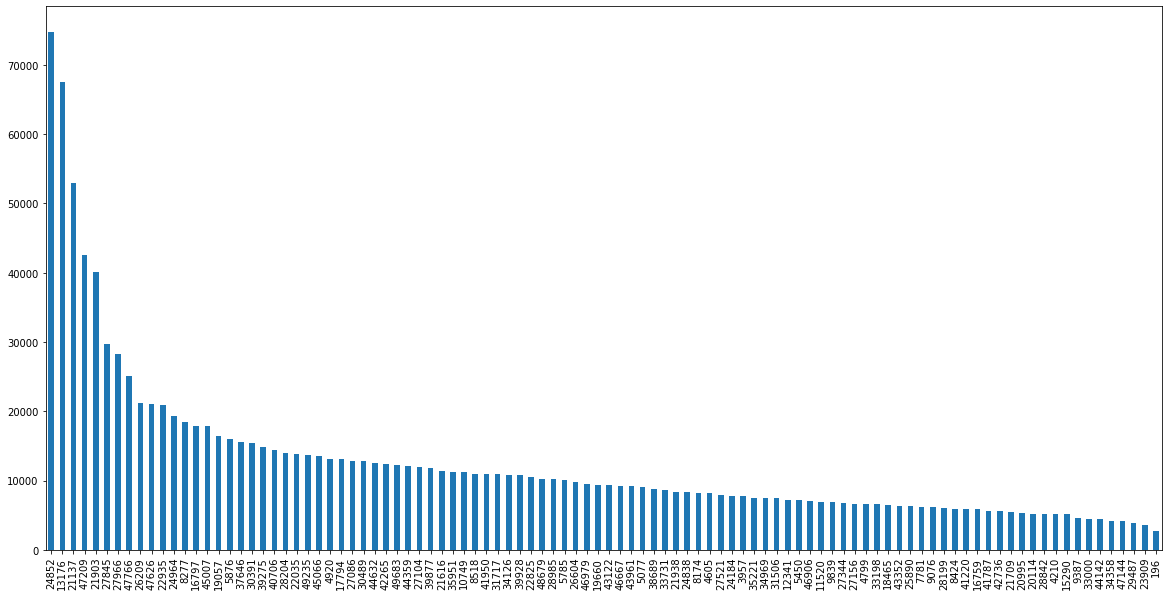

In [23]:
plt.figure(figsize=(20,10))
train_x_past['product_id'].value_counts().plot(kind='bar')
plt.show()

In [27]:
b = train.groupby(['week_day','order_id'],as_index=0).count()[['week_day','order_id','cstno']].sort_values(['week_day','order_id'],ascending=[1,0])
b
# week_day별로 order_id plot그리기
# 1. 요일별 주문 건수

,week_day,order_id,cstno
58176,0,999969,7
58175,0,999953,2
58174,0,999937,4
58173,0,999797,4
58172,0,999698,2
...,...,...,...
304543,6,1000508,3
304542,6,1000373,2
304541,6,1000321,2
304540,6,1000205,2


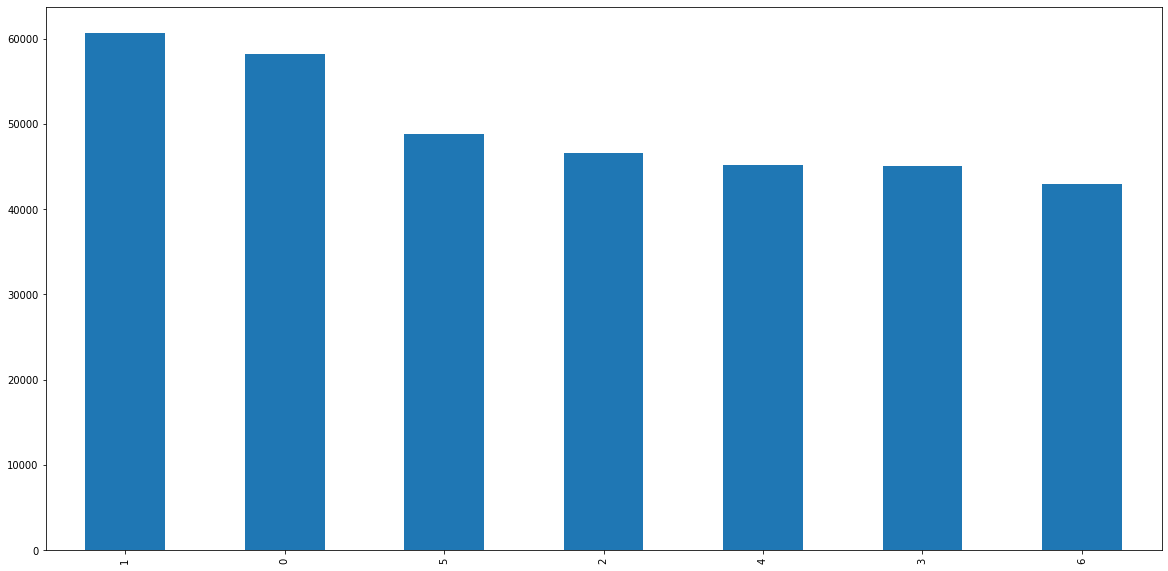

In [28]:
# 요일별 주문건수 확인
plt.figure(figsize=(20,10))
b['week_day'].value_counts().plot(kind='bar')
#df_train_y['product_id'].value_counts().plot(kind='bar')
plt.show()

In [52]:
# 유기농 organic 구분
organic = products_info['name'].str.contains('Organic')
products_info['is_organic'] = organic
products_info.iloc[10:20].head()

,product_id,name,category_id,division_id,category_name,division_name,is_organic
10,196,Soda,77,7,soft drinks,beverages,False
11,16759,Organic Carrot Bunch,83,4,fresh vegetables,produce,True
12,9387,Granny Smith Apples,24,4,fresh fruits,produce,False
13,4799,Shredded Parmesan,21,16,packaged cheese,dairy eggs,False
14,34358,Garlic,83,4,fresh vegetables,produce,False


In [79]:
# division 확인 : 부서확인
print('products : ', products_info.shape)
products_info.division_name.unique()

products :  (100, 7)


array(['beverages', 'frozen', 'dairy eggs', 'produce', 'canned goods',
       'deli', 'pantry', 'meat seafood', 'bakery'], dtype=object)

In [ ]:
plt.figure(figsize=(25,15))
df_train_past['product_id'].value_counts().plot(kind='bar')
#plt.show()

In [16]:
product_check.head()

,product_id,CNT
0,Banana,76026
1,Bag of Organic Bananas,68949
2,Organic Strawberries,54032
3,Organic Hass Avocado,43298
4,Organic Baby Spinach,40795


In [48]:
division_check = train.division_name.value_counts().reset_index().rename(columns={'index':'division','division_name':'CNT'})
division_check

,division,CNT
0,produce,994336
1,dairy eggs,169313
2,beverages,53016
3,deli,19977
4,frozen,11735
5,bakery,9247
6,pantry,7554
7,canned goods,6836
8,meat seafood,6382


In [24]:
category_check = train.category_name.value_counts().reset_index().rename(columns={'index':'category','category_name':'CNT'})
category_check

,category,CNT
0,fresh fruits,511626
1,fresh vegetables,288337
2,packaged vegetables fruits,152901
3,milk,58377
4,water seltzer sparkling water,42386
5,packaged cheese,35974
6,fresh herbs,27506
7,cream,26977
8,soy lactosefree,24181
9,packaged produce,13966


* 문자형 -> 숫자형

In [38]:
# object를 숫자형으로 변환
#pd.to_numeric(k.week_day, errors='coerce').fillna(0)
train[['order_number','week_day','order_hour','order_interval','add_order','is_reordered']] = train[['order_number','week_day','order_hour','order_interval','add_order','is_reordered']].apply(pd.to_numeric)

In [45]:
train.dtypes

order_id           object
cstno              object
order_number        int64
week_day            int64
order_hour          int64
order_interval    float64
add_order           int64
is_reordered        int64
product_id         object
name               object
category_id        object
division_id        object
category_name      object
division_name      object
dtype: object

* 연관분석ing 
  1. order_interval 이용 생각중 

In [47]:
# 연관분석
k = train[(train.cstno =='196613')] # 이 고객 71번 주문 = 과거70 + 최근1
len(k.order_id.unique())

71

In [46]:
train[(train.cstno =='196613') & (train.order_id =='717029')] 
# cstno & order_id->2 / cstno -> 203 / order_id -> 2

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,name,category_id,division_id,category_name,division_name
667878,717029,196613,15,1,9,3.0,5,0,41220,Organic Romaine Lettuce,83,4,fresh vegetables,produce
667879,717029,196613,15,1,9,3.0,7,1,44359,Organic Small Bunch Celery,83,4,fresh vegetables,produce


In [50]:
k.groupby('cstno')['order_interval'].mean()

cstno
196613    2.346535
Name: order_interval, dtype: float64